In [1]:
# concatenate the two data objects for lymph node and primary tumor

import scanpy as sc

adata_lymph = sc.read("/home/digemed/Sunaina-single-cell/samples/lymph_node_nbiswbatch_corrected.h5ad")
adata_primary = sc.read("/home/digemed/Sunaina-single-cell/samples/primary_tumor_nbiswbatch_corrected.h5ad")

adata_lymph.obs['type'] = "Metastatic" 
adata_primary.obs['type'] = "Primary"

adata = adata_primary.concatenate(adata_lymph) #setting the type and concatenating the adata objects
 
print(adata.obs['type'].value_counts())
print(adata.obs['batch'].value_counts())
print(adata.obs['sample'].value_counts())
adata

/home/digemed/Sunaina-single-cell/Project/Project/venv/lib/python3.8/site-packages/anndata/_core/anndata.py:1755: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


Metastatic    26015
Primary       22050
Name: type, dtype: int64
1    26015
0    22050
Name: batch, dtype: int64
Sample_7            11434
Sample_7_primary    11333
Sample_3             7353
Sample_2             7228
Sample_2_primary     5446
Sample_3_primary     5271
Name: sample, dtype: int64


AnnData object with n_obs × n_vars = 48065 × 1280
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_haemoglobin', 'log1p_total_counts_haemoglobin', 'pct_counts_haemoglobin', 'scDblFinder_score', 'scDblFinder_class', 'leiden', 'leiden_res0_25', 'leiden_res0_5', 'leiden_res1', 'n_counts', 'predicted_labels', 'majority_voting', 'conf_score', 'over_clustering', 'sample', 'batch', 'type', 'n_genes'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'haemoglobin', 'highly_variable', 'n_cells_by_counts-0-0', 'mean_counts-0-0', 'log1p_mean_counts-0-0', 'pct_dropout_by_counts-0-0', 'total_counts-0-0', 'log1p_total_counts-0-0', 'n_cells-0-0', 'highly_variable-0-0', 'means-0-0', 'dispersions-0-0', 'dispersions_norm-0-0', 'deviance-0-0', 'n_cells_by_counts-1-0', 'mean_counts-1-0', 'l

/home/digemed/Sunaina-single-cell/Project/Project/venv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


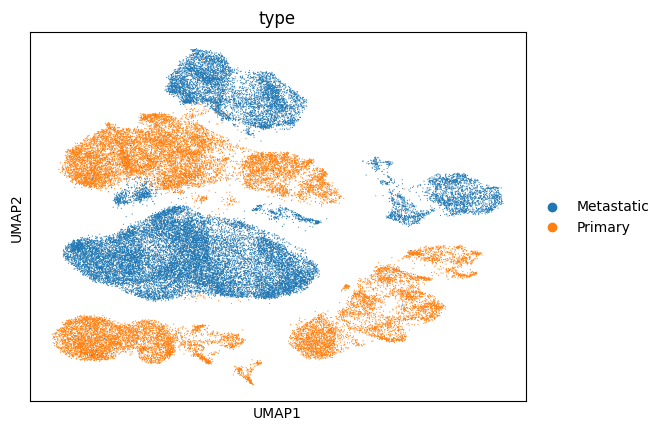

In [2]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(
    adata,
    color=["type"],
    frameon=True,
    ncols=2,
)

Wilcoxon rank sum test is used to rank the genes between primary and metastatic tissues.

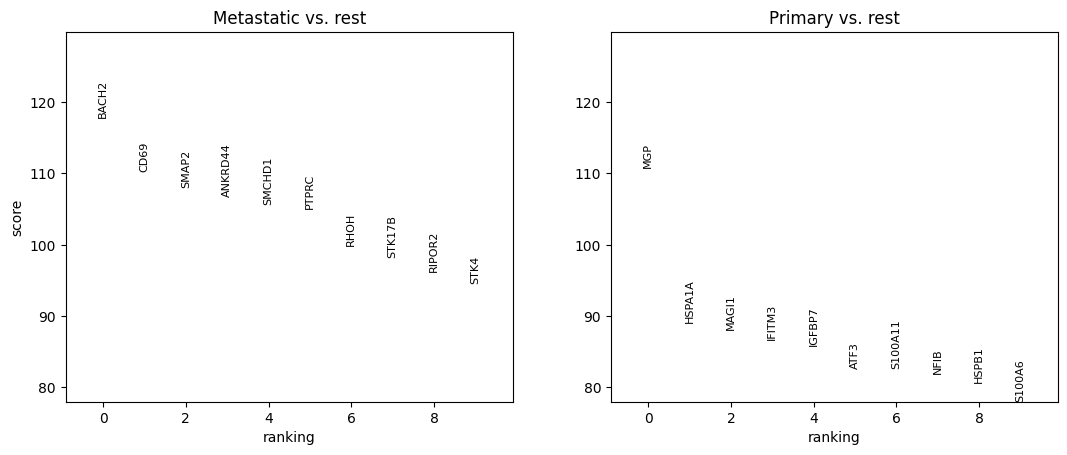

In [3]:
sc.tl.rank_genes_groups(adata, groupby='type', method="wilcoxon", use_raw=False, key_added = "wilcoxon")
sc.pl.rank_genes_groups(adata, n_genes=10, key="wilcoxon")

/home/digemed/Sunaina-single-cell/Project/Project/venv/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:580: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


categories: CD16+ NK cells, CD16- NK cells, Classical monocytes, etc.
var_group_labels: Metastatic, Primary


{'heatmap_ax': <Axes: >,
 'groupby_ax': <Axes: xlabel='majority_voting'>,
 'dendrogram_ax': <Axes: >,
 'gene_groups_ax': <Axes: >}

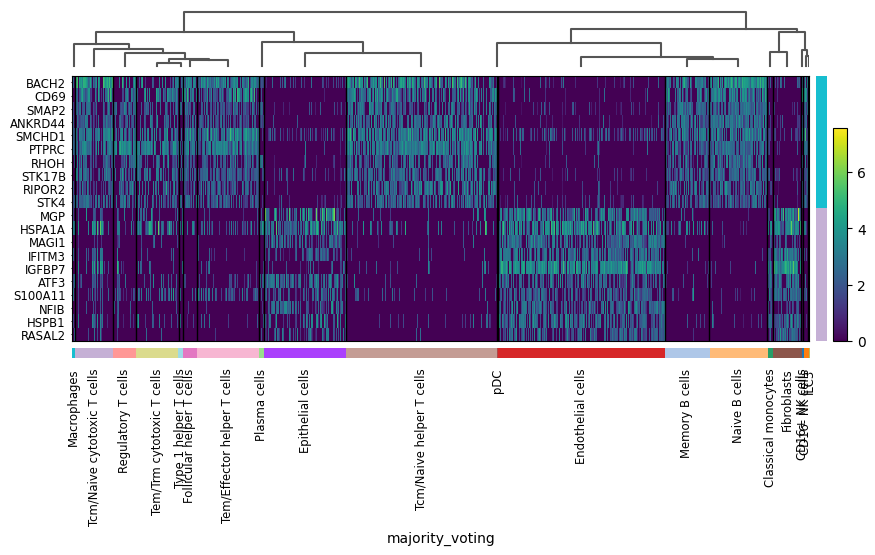

In [4]:
adata_cell_less = adata[adata.obs['majority_voting'].isin(['Alveolar macrophages', 'Migratory DCs', 'DC2', 'Double-positive thymocytes']) == False] #taking out the smaller clusters from the heatmap for visualisation, in addition these cell types were not important for breast cancer tisse as compared with Liu et al.Combined Single-Cell and Spatial Transcriptomics Reveal the Metabolic Evolvement of Breast Cancer during Early Dissemination
sc.tl.rank_genes_groups(adata_cell_less, groupby='type', method="wilcoxon", use_raw=False, key_added = "wilcoxon")
sc.pl.rank_genes_groups_heatmap(adata_cell_less, key="wilcoxon", show_gene_labels=True, groupby="majority_voting", swap_axes=True, show=False)


In [5]:
genes1 = sc.get.rank_genes_groups_df(adata_cell_less, group='Primary', key='wilcoxon')['names'][:20] #taking top 20 genes for visualisation that are differentially present in primary and metastatic
genes2 = sc.get.rank_genes_groups_df(adata_cell_less, group='Metastatic', key='wilcoxon')['names'][:20]
genes = list(genes1) + list(genes2)


/home/digemed/Sunaina-single-cell/Project/Project/venv/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


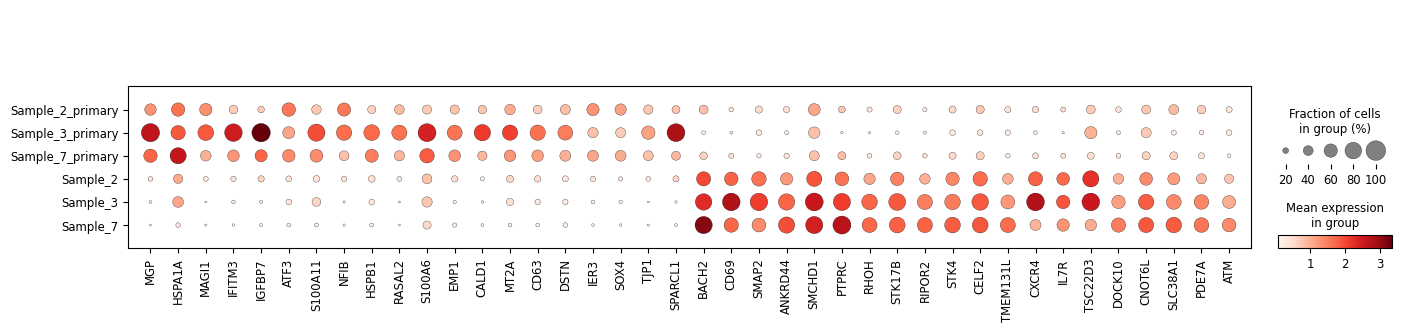

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sc.pl.dotplot(adata, genes, groupby='sample', categories_order = ['Sample_2_primary', 'Sample_3_primary', 'Sample_7_primary', 'Sample_2', 'Sample_3', 'Sample_7'])



In [7]:
import gseapy

The next cell requires a working internet connection.

In [10]:
gene_set_names = gseapy.get_library_name(organism='Human')
print(gene_set_names)

['ARCHS4_Cell-lines', 'ARCHS4_IDG_Coexp', 'ARCHS4_Kinases_Coexp', 'ARCHS4_TFs_Coexp', 'ARCHS4_Tissues', 'Achilles_fitness_decrease', 'Achilles_fitness_increase', 'Aging_Perturbations_from_GEO_down', 'Aging_Perturbations_from_GEO_up', 'Allen_Brain_Atlas_10x_scRNA_2021', 'Allen_Brain_Atlas_down', 'Allen_Brain_Atlas_up', 'Azimuth_Cell_Types_2021', 'BioCarta_2013', 'BioCarta_2015', 'BioCarta_2016', 'BioPlanet_2019', 'BioPlex_2017', 'CCLE_Proteomics_2020', 'CORUM', 'COVID-19_Related_Gene_Sets', 'COVID-19_Related_Gene_Sets_2021', 'Cancer_Cell_Line_Encyclopedia', 'CellMarker_Augmented_2021', 'ChEA_2013', 'ChEA_2015', 'ChEA_2016', 'ChEA_2022', 'Chromosome_Location', 'Chromosome_Location_hg19', 'ClinVar_2019', 'DSigDB', 'Data_Acquisition_Method_Most_Popular_Genes', 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019', 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019', 'Descartes_Cell_Types_and_Tissue_2021', 'Diabetes_Perturbations_GEO_2022', 'DisGeNET', 'Disease_Perturbations_from_GEO_down', 'Disease

Hypergeometric distribution that is used to calculate the P-value of gene sets:

Hypergeometric distribution is a discrete distribution that models the probability of <i> k </i> successes in <i> n </i> draws in a system with <i> N </i> population size and <i> K </i> number of successes in the population.

Probability mass function that calculates the probability of each draw is:

$$Pr(X = k) = \frac{\binom{K}{k}\binom{N - k}{n - k}}{\binom{N}{n}} $$

This describes the probability of differentially expressed genes (k) being associated with some gene set, for all genes in our gene list (n) from a population of all the genes in entire genome (N) which contains K genes that are associated with the gene set.

['MGP', 'HSPA1A', 'MAGI1', 'IFITM3', 'IGFBP7', 'ATF3', 'S100A11', 'NFIB', 'HSPB1', 'RASAL2', 'S100A6', 'EMP1', 'CALD1', 'MT2A', 'CD63', 'DSTN', 'IER3', 'SOX4', 'TJP1', 'SPARCL1', 'PTPRK', 'EPAS1', 'CST3', 'YBX3', 'HES1', 'WWTR1', 'CEBPD', 'APBB2', 'TM4SF1', 'RBPMS', 'IFI27', 'COL4A2', 'COL4A1', 'APP', 'FNDC3B', 'DST', 'MYO1E', 'ADAMTS9', 'CRIM1', 'TSC22D1', 'PTPRM', 'PDLIM5', 'STK3', 'HSPA1B', 'VIM', 'TPM1', 'CADPS2', 'IGFBP4', 'PTPRG', 'SQSTM1', 'ADIRF', 'PIK3R3', 'RHOB', 'SASH1', 'TIMP3', 'TCF4', 'NFIA', 'LGALS1', 'DOCK4', 'PEAK1', 'CALCRL', 'NRP1', 'GSN', 'BMPR2', 'PKP4', 'MCTP1', 'A2M', 'PDLIM1', 'TRIO', 'RBMS3', 'PLCB1', 'ETS2', 'PTK2', 'ITGB1', 'ADGRL4', 'FBXL7', 'CLIC4', 'ARHGEF12', 'TCF7L2', 'ADAMTS1', 'HSP90AB1', 'TTC28', 'GRB10', 'LRMDA', 'LHFPL6', 'CLU', 'S100A10', 'ZNF385D', 'DLC1', 'LDB2', 'BHLHE40', 'GNG11', 'CAV1', 'MAST4', 'PPFIBP1', 'KLF4', 'HSPD1', 'CAVIN1', 'THSD7A', 'SPATS2L', 'PLCB4', 'MYO1D', 'EMCN', 'MECOM', 'PDK4', 'PLK2', 'PLXDC2', 'THBS1', 'LRRFIP2', 'PREX2', 

<Axes: title={'center': 'MSigDB_Hallmark_2020'}, xlabel='$- \\log_{10}$ (Adjusted P-value)'>

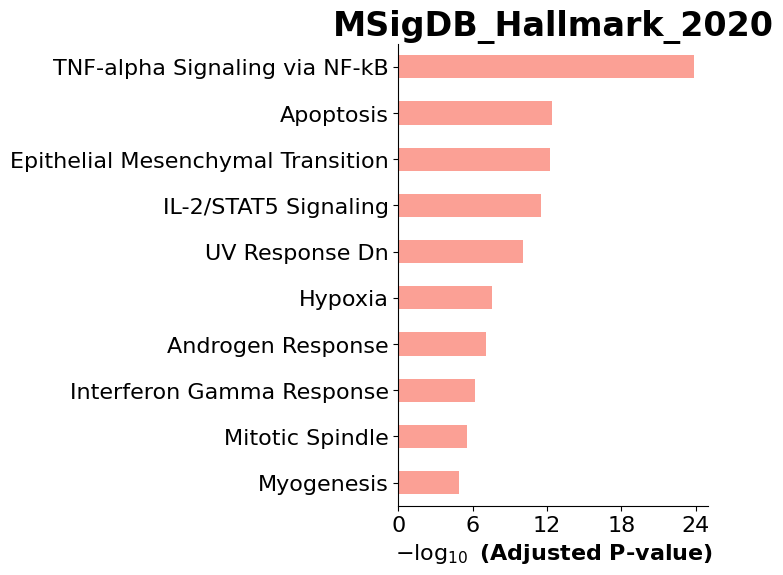

In [11]:
import gseapy, matplotlib.pyplot as plt

gene_set_names = gseapy.get_library_name(organism='Human')
glist = sc.get.rank_genes_groups_df(adata_cell_less, group='Primary', 
                                    key='wilcoxon', log2fc_min=0.25, 
                                    pval_cutoff=0.05)['names'].squeeze().str.strip().tolist()
print((glist))
enr_res = gseapy.enrichr(gene_list=glist,
                     organism='Human',
                     gene_sets='MSigDB_Hallmark_2020',
                     cutoff = 0.5) 
print(enr_res.results.head())
print(enr_res.res2d)
gseapy.barplot(enr_res.res2d,title='MSigDB_Hallmark_2020')


Ranking the genes using their p-values:

In [12]:
import numpy as np

sc.tl.rank_genes_groups(adata, groupby='type', method="wilcoxon", use_raw=False, key_added = "wilcoxon")
genes1 = sc.get.rank_genes_groups_df(adata, group='Primary', key='wilcoxon')
# genes2 = sc.get.rank_genes_groups_df(adata, group='Metastatic', key='wilcoxon')['names'][:20]

genes1['negative_log_adj_pval'] = np.log10(genes1['pvals_adj']) * (-1)

genes1.sort_values('pvals_adj') 
# sns.scatterplot(genes1, x = "logfoldchanges", y = "negative_log_adj_pval")

/home/digemed/Sunaina-single-cell/Project/Project/venv/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,names,scores,logfoldchanges,pvals,pvals_adj,negative_log_adj_pval
0,MGP,110.774910,4.771876,0.000000,0.000000,inf
1182,LEPROTL1,-45.216076,-1.739619,0.000000,0.000000,inf
1183,NSD3,-45.344746,-1.285233,0.000000,0.000000,inf
1184,PPP1CB,-45.673222,-1.250688,0.000000,0.000000,inf
1185,SH3KBP1,-46.076611,-1.478236,0.000000,0.000000,inf
...,...,...,...,...,...,...
568,P4HA1,-0.174215,-0.064136,0.861697,0.864398,0.063286
564,IGHG4,0.153876,0.254175,0.877708,0.879770,0.055631
565,CHD4,0.132443,-0.006279,0.894634,0.896034,0.047676
567,AC087286.2,-0.093964,0.024830,0.925138,0.925861,0.033454


0     Epithelial Mesenchymal Transition
1                            Myogenesis
2                        UV Response Dn
3                          Adipogenesis
4                    TGF-beta Signaling
5                   Allograft Rejection
6                             Apoptosis
7                       Apical Junction
8                           p53 Pathway
9               Estrogen Response Early
10                     mTORC1 Signaling
11                      Mitotic Spindle
12        TNF-alpha Signaling via NF-kB
13                    KRAS Signaling Up
14                Inflammatory Response
15                 IL-2/STAT5 Signaling
16            Unfolded Protein Response
17                              Hypoxia
18                    Androgen Response
19                      heme Metabolism
20                           Complement
21                           Glycolysis
22            Interferon Gamma Response
23                      G2-M Checkpoint
24               Estrogen Response Late


[<Axes: xlabel='Gene Rank', ylabel='Ranked metric'>,
 <Axes: >,
 <Axes: >,
 <Axes: ylabel='Enrichment Score'>]

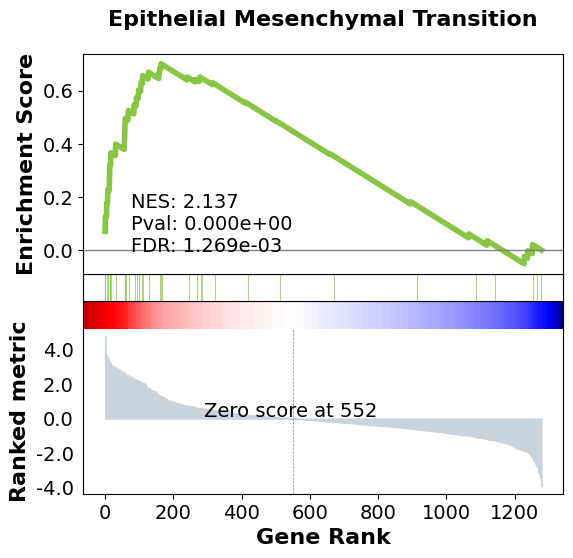

In [14]:
gene_set_names = gseapy.get_library_name(organism='Human')
gene_rank = sc.get.rank_genes_groups_df(adata, group='Primary', key='wilcoxon')[['names','logfoldchanges']]
gene_rank.sort_values(by=['logfoldchanges'], inplace=True, ascending=False)

# calculate_qc_metrics will calculate number of cells per gene
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)
gene_rank = gene_rank[gene_rank['names'].isin(adata.var_names[adata.var.n_cells_by_counts>30])] #This is performed for all genes that are present in more than 30 cells.
res = gseapy.prerank(rnk=gene_rank, gene_sets='MSigDB_Hallmark_2020') #after pre-ranking the genes, the gene set is used to generate enriched terms

terms = res.res2d.Term
print(terms)
gene_set_names = gseapy.get_library_name(organism='Human')
print(gene_rank)

gseapy.gseaplot(rank_metric=res.ranking, term=terms[0], **res.results[terms[0]])


### scCODA - a Bayesian model for compositional data analysis

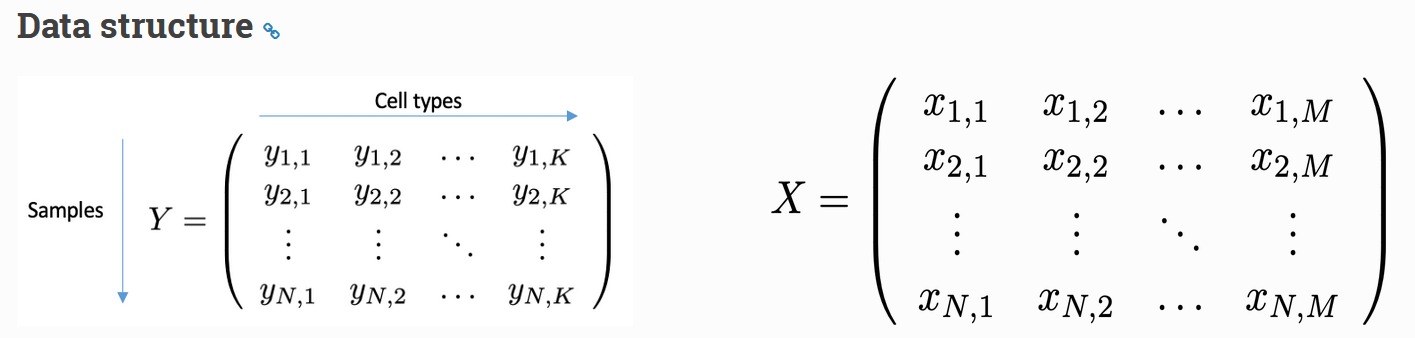

Codes in the compositional_cell.py file.